In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# K-Means Клъстеризация

### 1. Зареждане на данните

In [105]:
# Зареждане на dataset-а
url = "https://data.nasa.gov/resource/y77d-th95.csv"
df = pd.read_csv(url)

df.head(10)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,geolocation_address,geolocation_city,geolocation_state,geolocation_zip
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,POINT (6.08333 50.775),NaN,NaN,NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,POINT (10.23333 56.18333),NaN,NaN,NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,POINT (-113 54.21667),NaN,NaN,NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,POINT (-99.9 16.88333),NaN,NaN,NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,POINT (-64.95 -33.16667),NaN,NaN,NaN,NaN
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919-01-01T00:00:00.000,32.10000,71.80000,POINT (71.8 32.1),NaN,NaN,NaN,NaN
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949-01-01T00:00:00.000,44.83333,95.16667,POINT (95.16667 44.83333),NaN,NaN,NaN,NaN
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01T00:00:00.000,44.21667,0.61667,POINT (0.61667 44.21667),NaN,NaN,NaN,NaN
8,Aguada,398,Valid,L6,1620.0,Fell,1930-01-01T00:00:00.000,-31.60000,-65.23333,POINT (-65.23333 -31.6),NaN,NaN,NaN,NaN
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920-01-01T00:00:00.000,-30.86667,-64.55000,POINT (-64.55 -30.86667),NaN,NaN,NaN,NaN


### 2. Анализ

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1000 non-null   object 
 1   id                   1000 non-null   int64  
 2   nametype             1000 non-null   object 
 3   recclass             1000 non-null   object 
 4   mass                 972 non-null    float64
 5   fall                 1000 non-null   object 
 6   year                 999 non-null    object 
 7   reclat               988 non-null    float64
 8   reclong              988 non-null    float64
 9   geolocation          988 non-null    object 
 10  geolocation_address  0 non-null      float64
 11  geolocation_city     0 non-null      float64
 12  geolocation_state    0 non-null      float64
 13  geolocation_zip      0 non-null      float64
dtypes: float64(7), int64(1), object(6)
memory usage: 109.5+ KB


Вижда се, че има 1000 записа. В някои от колоните се забелязват липващи стойности.

In [107]:
df.describe()

,id,mass,reclat,reclong,geolocation_address,geolocation_city,geolocation_state,geolocation_zip
count,1000.00000,9.720000e+02,988.000000,988.000000,0.0,0.0,0.0,0.0
mean,15398.72800,5.019020e+04,29.691592,19.151208,NaN,NaN,NaN,NaN
std,10368.70402,7.539857e+05,23.204399,68.644015,NaN,NaN,NaN,NaN
min,1.00000,1.500000e-01,-44.116670,-157.866670,NaN,NaN,NaN,NaN
25%,7770.50000,6.795000e+02,21.300000,-5.195832,NaN,NaN,NaN,NaN
50%,12757.50000,2.870000e+03,35.916665,17.325000,NaN,NaN,NaN,NaN
75%,18831.25000,1.005000e+04,45.817835,76.004167,NaN,NaN,NaN,NaN
max,57168.00000,2.300000e+07,66.348330,174.400000,NaN,NaN,NaN,NaN


In [108]:
df[df['mass'] > 1000000].head(10)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,geolocation_address,geolocation_city,geolocation_state,geolocation_zip
29,Allende,2278,Valid,CV3,2000000.0,Fell,1969-01-01T00:00:00.000,26.96667,-105.31667,POINT (-105.31667 26.96667),NaN,NaN,NaN,NaN
419,Jilin,12171,Valid,H5,4000000.0,Fell,1976-01-01T00:00:00.000,44.05000,126.16667,POINT (126.16667 44.05),NaN,NaN,NaN,NaN
506,Kunya-Urgench,12379,Valid,H5,1100000.0,Fell,1998-01-01T00:00:00.000,42.25000,59.20000,POINT (59.2 42.25),NaN,NaN,NaN,NaN
707,Norton County,17922,Valid,Aubrite,1100000.0,Fell,1948-01-01T00:00:00.000,39.68333,-99.86667,POINT (-99.86667 39.68333),NaN,NaN,NaN,NaN
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,1947-01-01T00:00:00.000,46.16000,134.65333,POINT (134.65333 46.16),NaN,NaN,NaN,NaN


Записи на метеорити с маса над 10 тона.

### 3. Почистване на данните

Взимат се само нужните колони. Липсващите стойности се премахват.

In [109]:
df['year'] = pd.to_datetime(df['year'], errors='coerce').dt.year
df_cleaned = df[['name', 'mass', 'year', 'reclat', 'reclong']].dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 0 to 999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     948 non-null    object 
 1   mass     948 non-null    float64
 2   year     948 non-null    float64
 3   reclat   948 non-null    float64
 4   reclong  948 non-null    float64
dtypes: float64(4), object(1)
memory usage: 44.4+ KB


### 4. Преглед на разпределението на данните

K-Means е чувствителн към outliers. Ако в данните има такива, те могат да изкривят позицията на центроидите, тъй като средната стойност е много чувствителна към големи отклонения. За това търсим такива в данните.

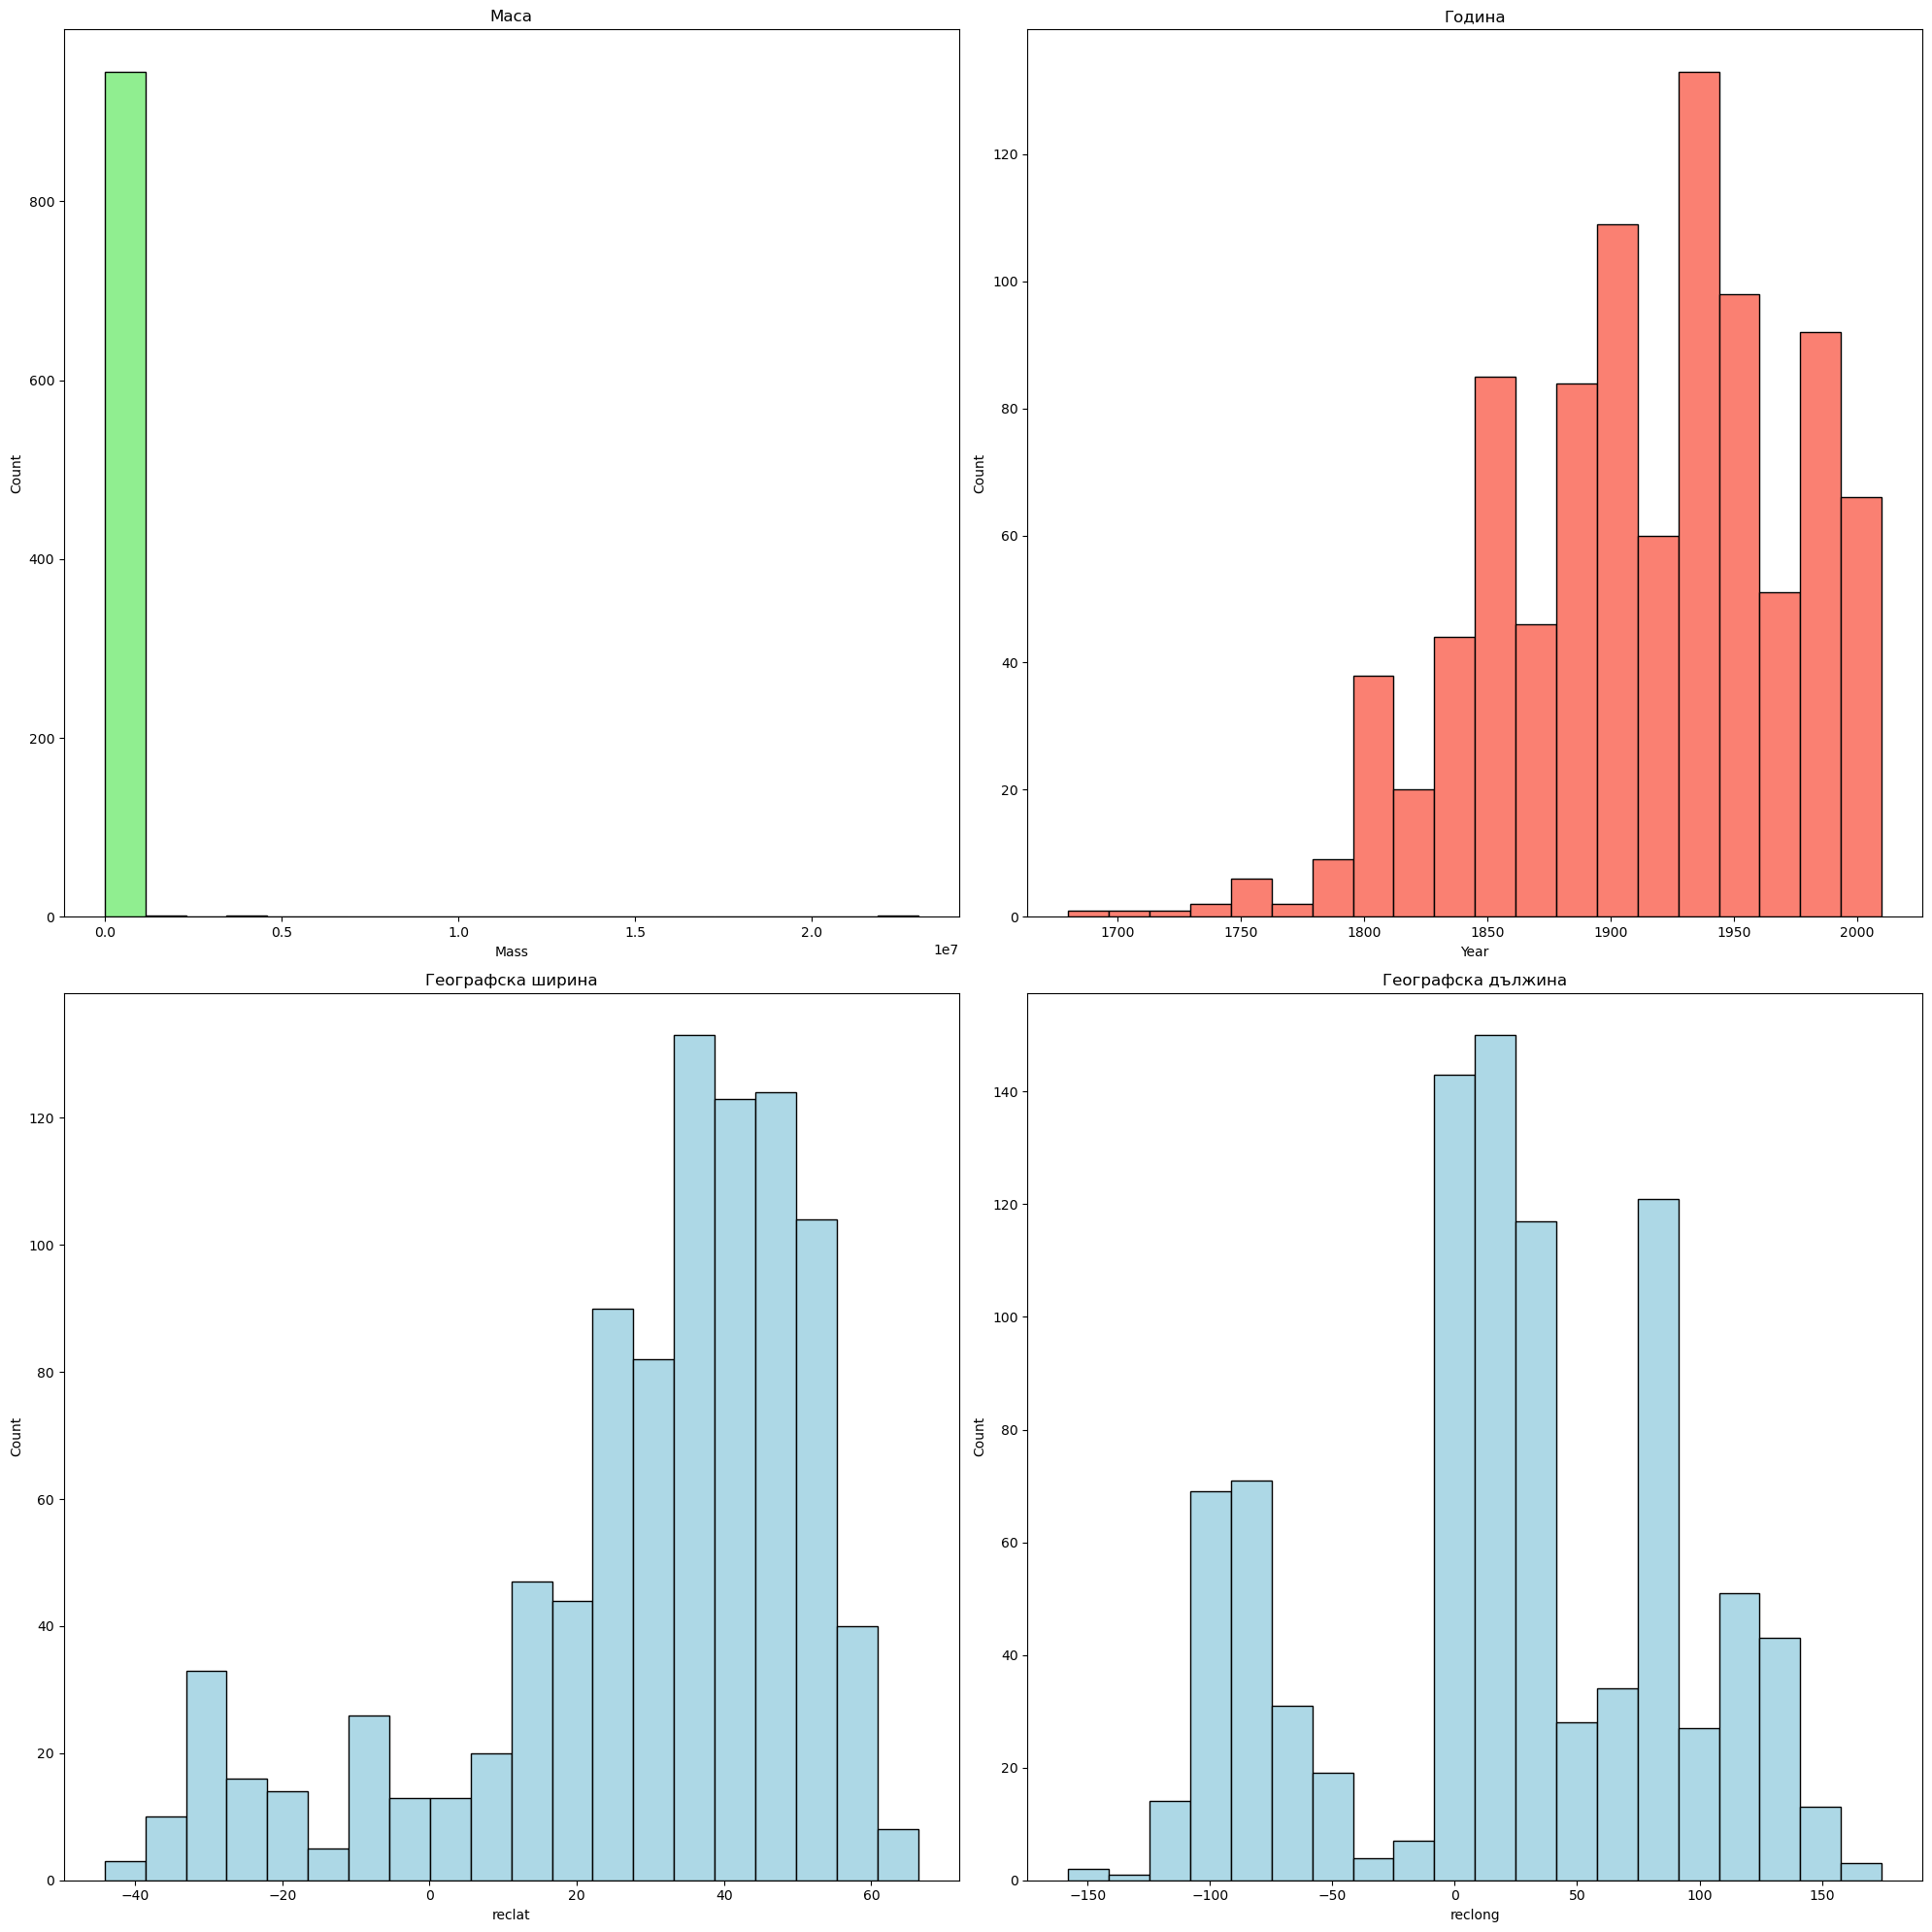

In [110]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.hist(df_cleaned['mass'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Маса')
plt.xlabel('Mass')
plt.ylabel('Count')

year_hundred =  df_cleaned['year'] // 10 * 10
plt.subplot(2, 2, 2)
plt.hist(year_hundred, bins=20, color='salmon', edgecolor='black')
plt.title('Година')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(df_cleaned['reclat'], bins=20, color='lightblue', edgecolor='black')
plt.title('Географска ширина')
plt.xlabel('reclat')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(df_cleaned['reclong'], bins=20, color='lightblue', edgecolor='black')
plt.title('Географска дължина')
plt.xlabel('reclong')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

В 'Маса' се забелязват outliers. В другите колони също се наблюдават такива, но стойностите им не са силно различаващи се от останалите.

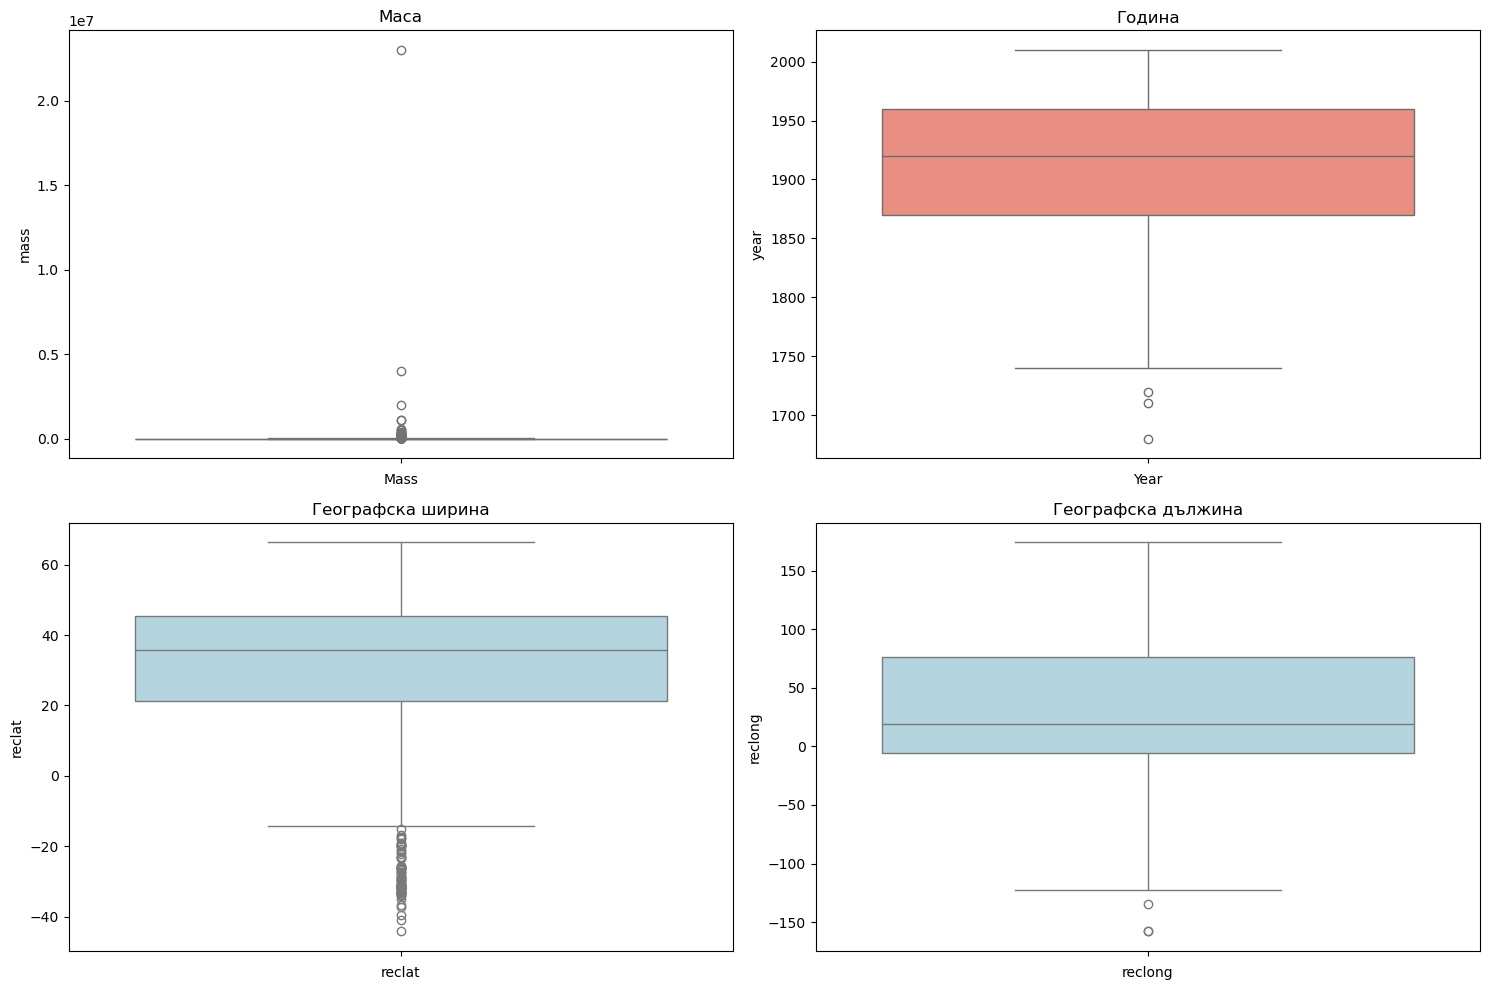

In [111]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df_cleaned['mass'], color='lightgreen')
plt.title('Маса')
plt.xlabel('Mass')

plt.subplot(2, 2, 2)
sns.boxplot(data=year_hundred, color='salmon')
plt.title('Година')
plt.xlabel('Year')

plt.subplot(2, 2, 3)
sns.boxplot(data=df_cleaned['reclat'], color='lightblue')
plt.title('Географска ширина')
plt.xlabel('reclat')

plt.subplot(2, 2, 4)
sns.boxplot(data=df_cleaned['reclong'], color='lightblue')
plt.title('Географска дължина')
plt.xlabel('reclong')

plt.tight_layout()
plt.show()

### 5. Разделяне на outliers от останалите данни 

Взимат се стойностите на 1-ви и 3-ти квартил (Q1 и Q3) и се изчислява IQR (inter quartile range) - диапазонът, в който се намират 50% от данните.

$IQR=Q3−Q1$

Отделят се данните с маса извън долната и горна граница.

Горна граница: $Q3+1.5×IQR$

Долна граница: $Q1−1.5×IQR$


Данните се филтрират.

In [112]:
def get_outliers(data_frame):
    m_q1 = data_frame['mass'].quantile(0.25)
    m_q3 = data_frame['mass'].quantile(0.75)
    m_iqr = m_q3 - m_q1

    mass_ouliers_df = data_frame[(data_frame['mass'] > (m_q3 + 1.5 * m_iqr)) | (data_frame['mass'] < (m_q1 - 1.5 * m_iqr))].copy()

    return mass_ouliers_df

In [113]:
mass_outliers_df = get_outliers(df_cleaned)

no_outliers_df = df_cleaned[(~df_cleaned.index.isin(mass_outliers_df.index))]

no_outliers_df.describe()

,mass,year,reclat,reclong
count,810.000000,810.000000,810.000000,810.000000
mean,4065.017914,1916.893827,29.000418,20.212505
std,5210.294725,58.205497,23.145067,68.797892
min,0.150000,1688.000000,-44.116670,-157.866670
25%,500.000000,1876.000000,20.891665,-4.199997
50%,1890.000000,1924.000000,35.183335,19.050000
75%,5209.750000,1962.000000,45.183333,76.766667
max,24000.000000,2012.000000,66.348330,174.400000


In [114]:
def mass_boxplot(mass):
    plt.figure(figsize=(15, 6))

    sns.boxplot(data=mass, color='lightgreen')
    plt.title('Маса')
    plt.xlabel('Mass')
    
    plt.tight_layout()
    plt.show()

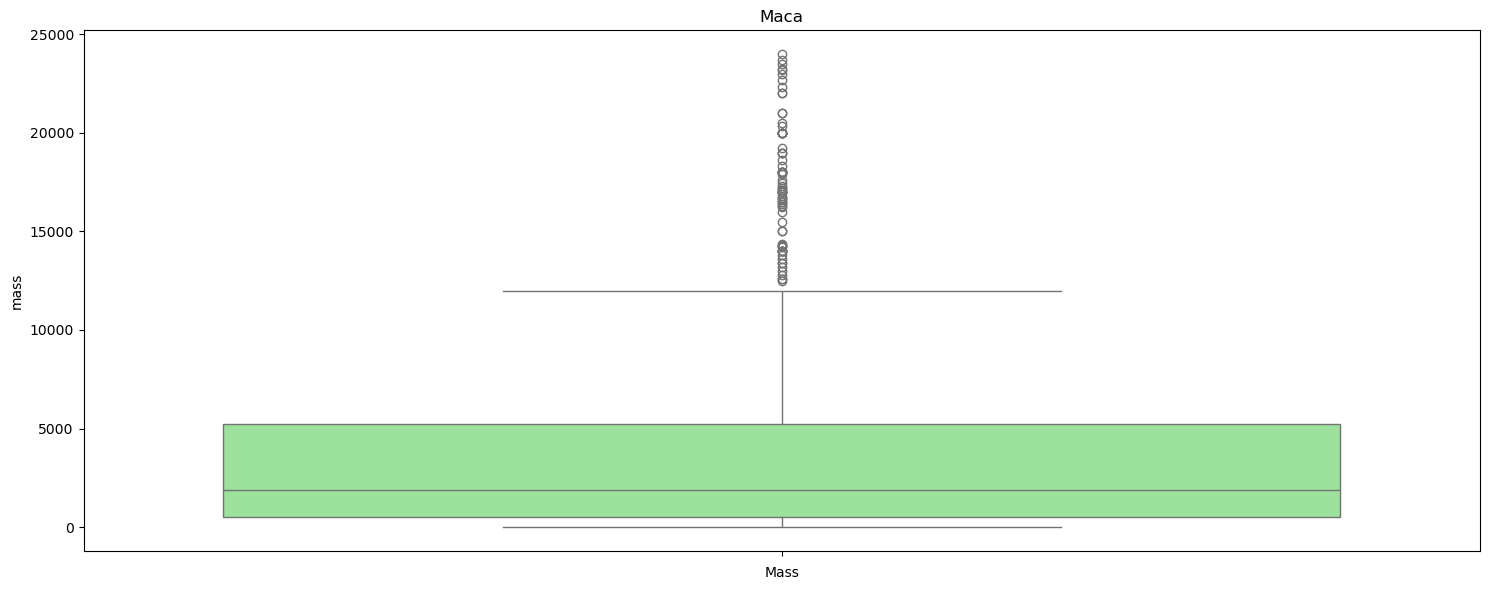

In [115]:
mass_boxplot(no_outliers_df['mass'])

In [116]:
big_outliers_df = get_outliers(mass_outliers_df)

no_big_outliers_df = mass_outliers_df[(~mass_outliers_df.index.isin(big_outliers_df.index))]

no_big_outliers_df.describe()

,mass,year,reclat,reclong
count,125.000000,125.000000,125.000000,125.000000
mean,85280.840000,1920.736000,32.492248,12.257164
std,70184.137162,60.844215,23.217919,71.151806
min,24700.000000,1740.000000,-36.616670,-117.933330
25%,37500.000000,1877.000000,26.034720,-7.270000
50%,51700.000000,1923.000000,39.750000,16.300000
75%,100000.000000,1978.000000,46.883330,53.250000
max,303000.000000,2013.000000,64.020000,161.808330


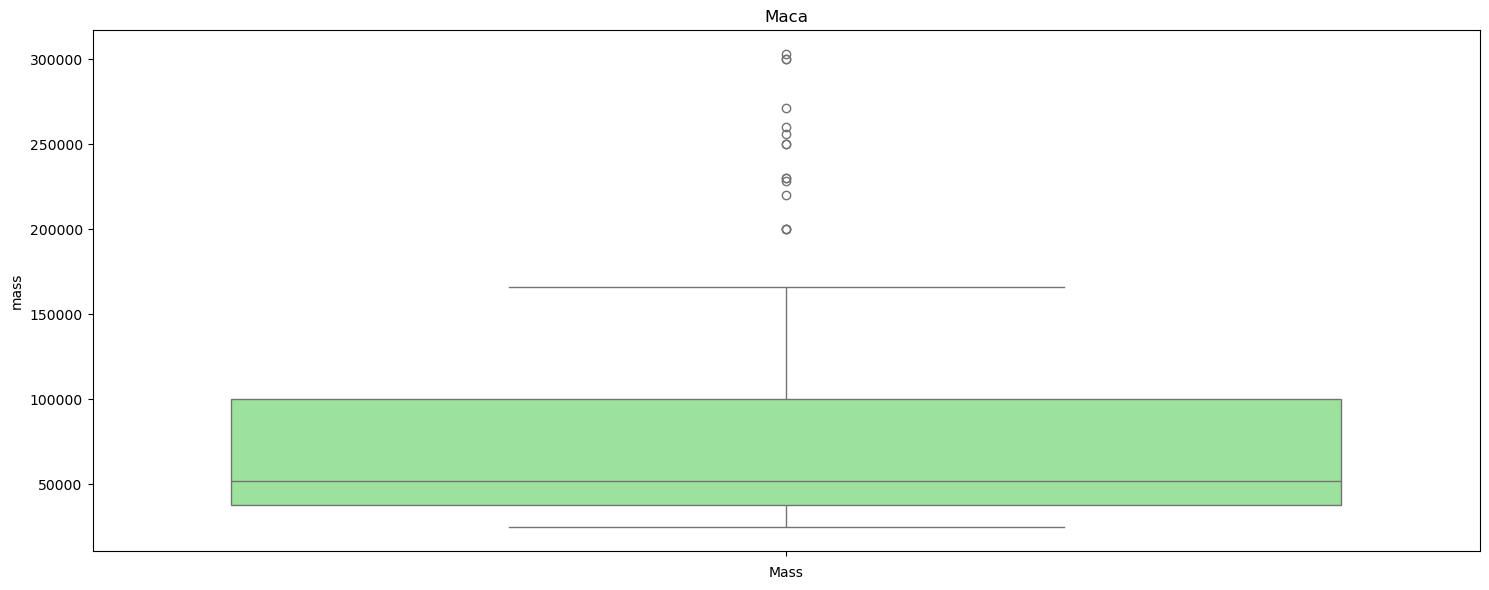

In [117]:
mass_boxplot(no_big_outliers_df['mass'])

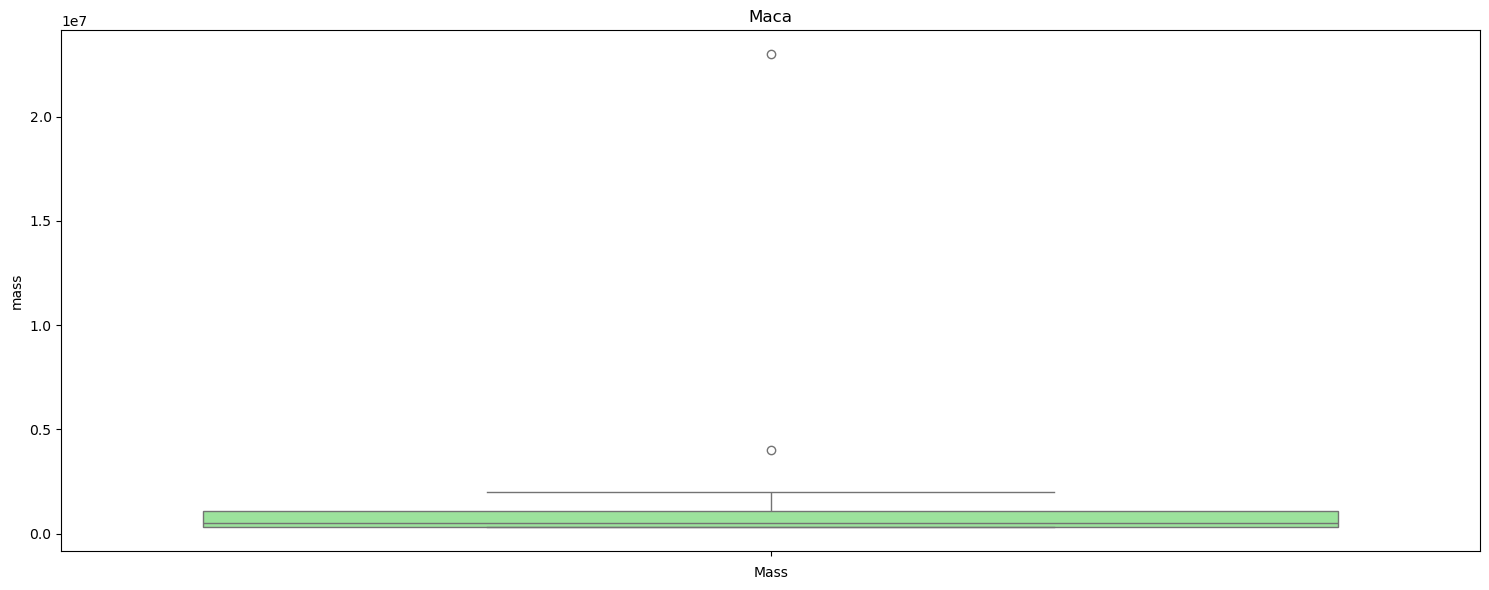

In [118]:
mass_boxplot(big_outliers_df['mass'])

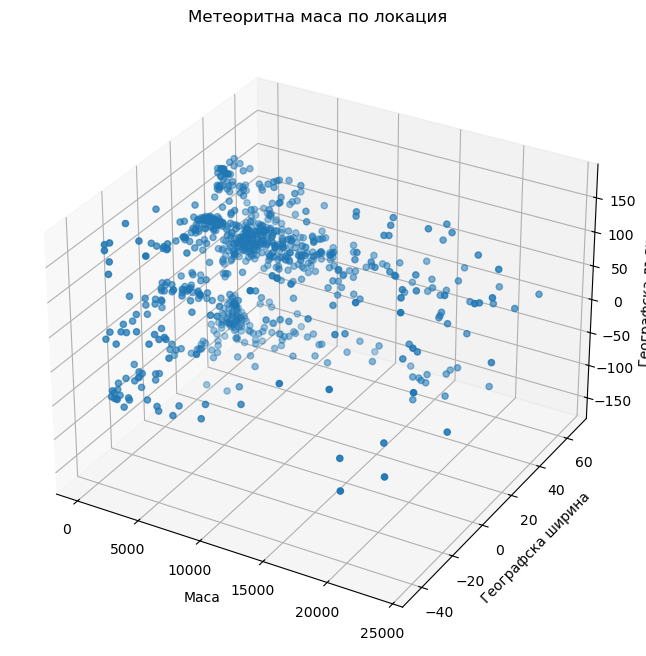

In [119]:
plot_3d(no_outliers_df['mass'], no_outliers_df['reclat'], no_outliers_df['reclong'])

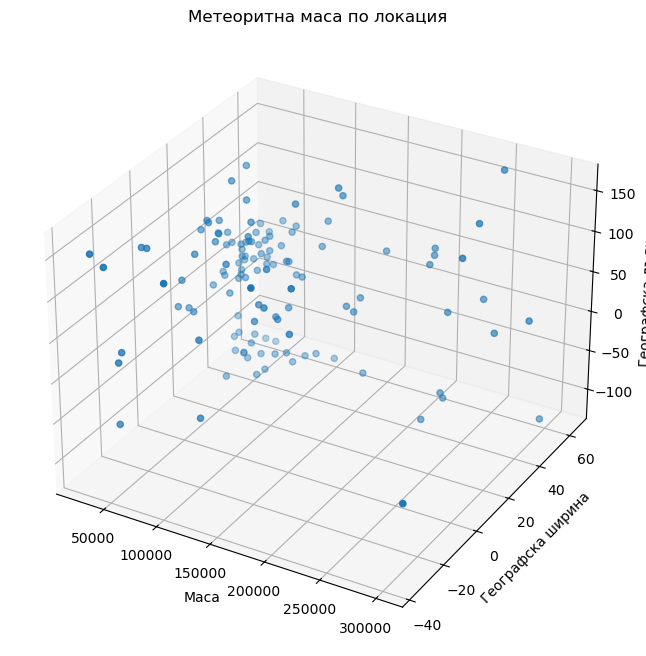

In [120]:
plot_3d(no_big_outliers_df['mass'], no_big_outliers_df['reclat'], no_big_outliers_df['reclong'])

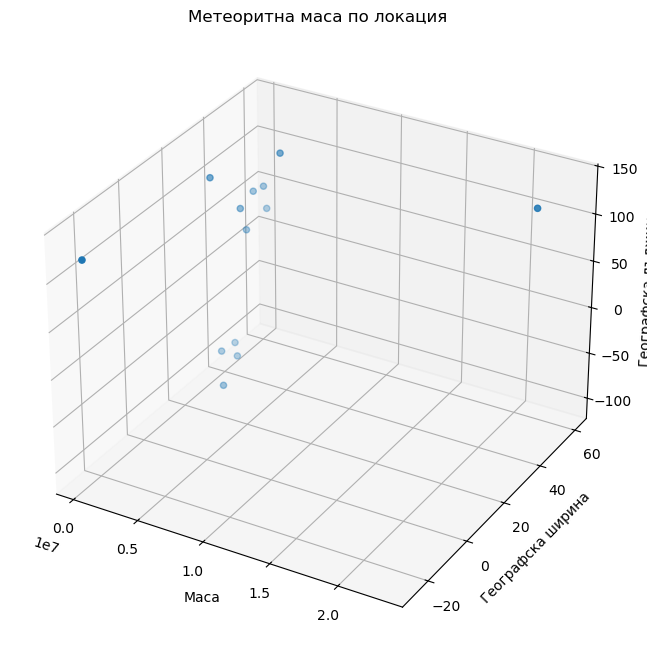

In [121]:
plot_3d(big_outliers_df['mass'], big_outliers_df['reclat'], big_outliers_df['reclong'])

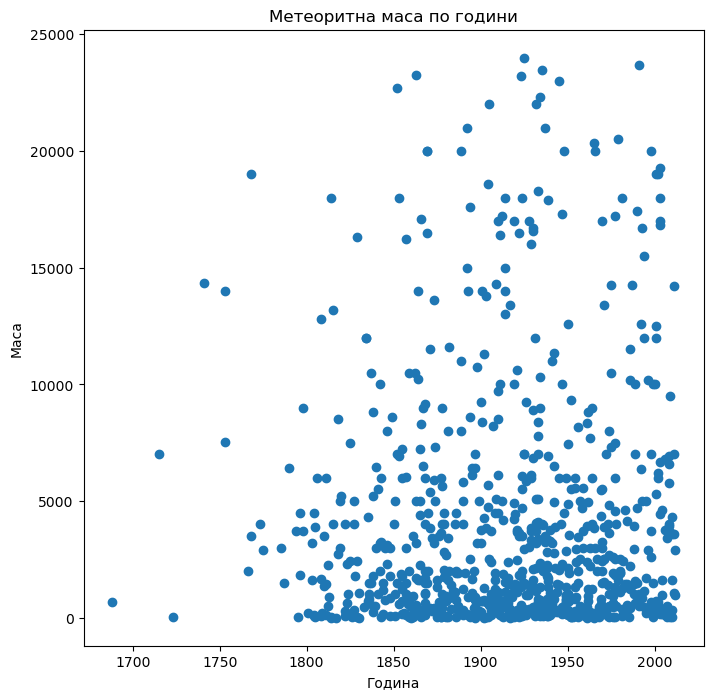

In [122]:
plot_2d(no_outliers_df['year'], no_outliers_df['mass'])

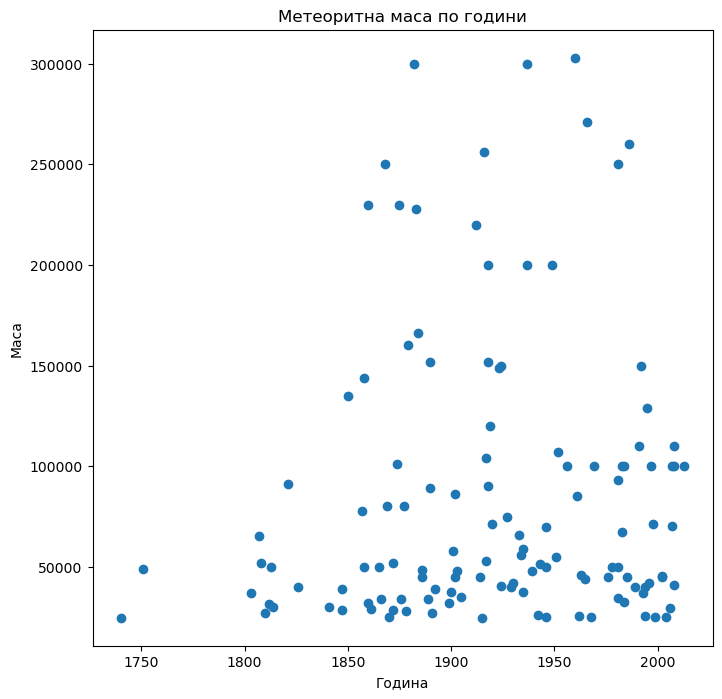

In [123]:
plot_2d(no_big_outliers_df['year'], no_big_outliers_df['mass'])

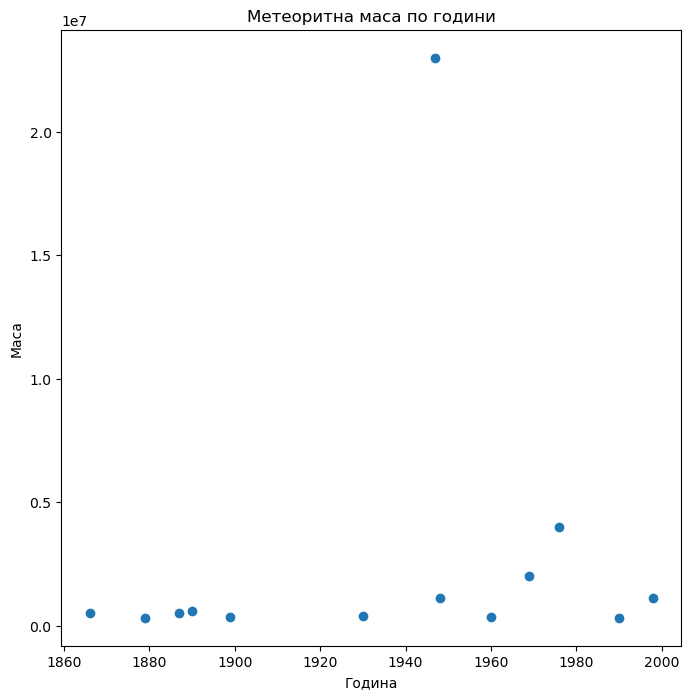

In [124]:
plot_2d(big_outliers_df['year'], big_outliers_df['mass'])

# 6. Нормализиране на данните

Използва се Z-scale нормализация. Използва се за привеждане на стойностите на даден атрибут към стандартна форма, така че да имат средна стойност 0 и стандартно отклонение 1. Това улеснява работата на алгоритмите за машинно обучение, тъй като елиминира влиянието на различните мащаби на данните.

$$ Z = \frac{X - μ}  σ $$

Където:

   - $X$ е оригиналната стойност на дадена характеристика,
   - $μ$ е средната стойност на характеристиката,
   - $σ$ е стандартното отклонение.




In [125]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(no_outliers_df[['mass', 'reclat', 'reclong']])
scaled_data_year = scaler.fit_transform(no_outliers_df[['mass', 'year']])


In [126]:
scaled_data_df = pd.DataFrame(scaled_data, index=no_outliers_df.index, columns=('mass', 'reclat', 'reclong'))
scaled_data_year_df = pd.DataFrame(scaled_data_year, index=no_outliers_df.index, columns=('mass', 'year'))

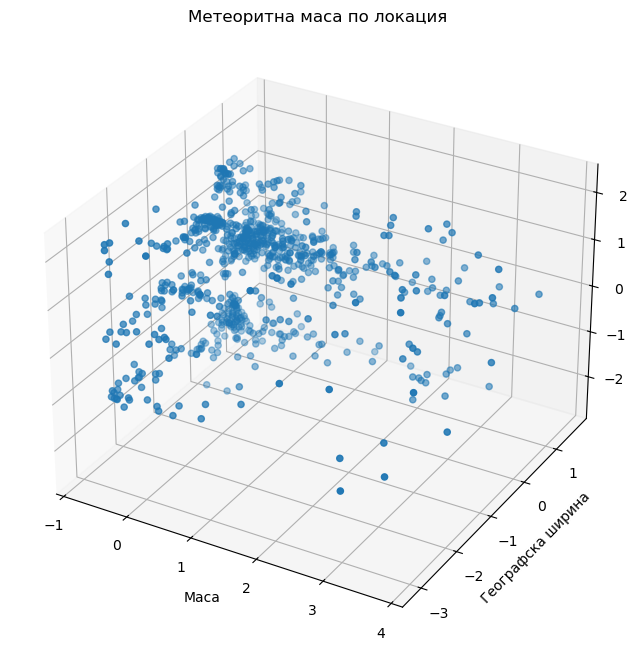

In [137]:
plot_3d(scaled_data_df['mass'], scaled_data_df['reclat'] , scaled_data_df['reclong'])

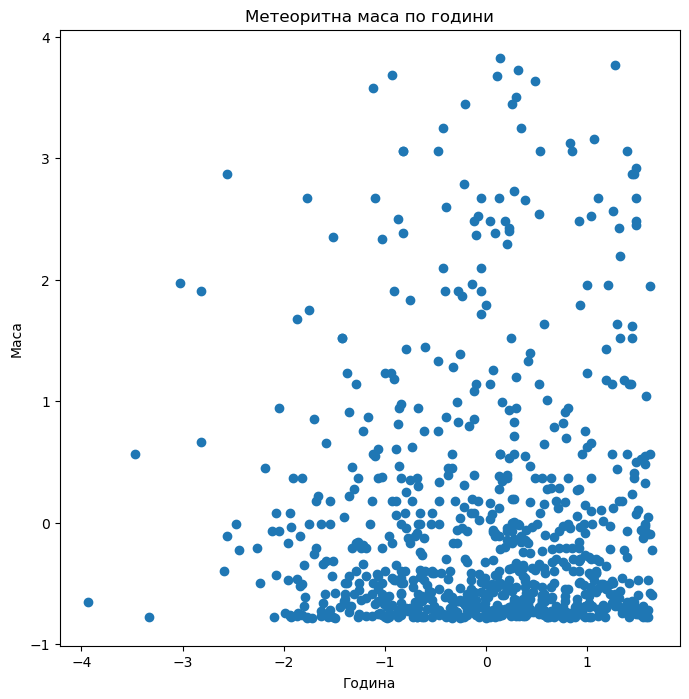

In [129]:
plot_2d(scaled_data_year_df['year'], scaled_data_year_df['mass'])

# 7. Определяне на броя клъстери (Elbow Method)

При метода на лакътя за определяне на оптималния брой клъстери се ползва инерция. Тя е мярка за близостта на точките в даден клъстер. Когато инерцията е малка, точките в клъстера са много близо до центъра, което означава, че клъстеризацията е успешна и клъстерите са добре дефинирани и обратното. Изчислява се инерцията при различни стойности на k (броя на клъстерите).
След това се анализира графиката на инерцията спрямо k и се търси лакътя, където инерцията започва да намалява по-бавно. Това е оптималният брой клъстери.

In [130]:
scaled_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mass     810 non-null    float64
 1   reclat   810 non-null    float64
 2   reclong  810 non-null    float64
dtypes: float64(3)
memory usage: 25.3 KB


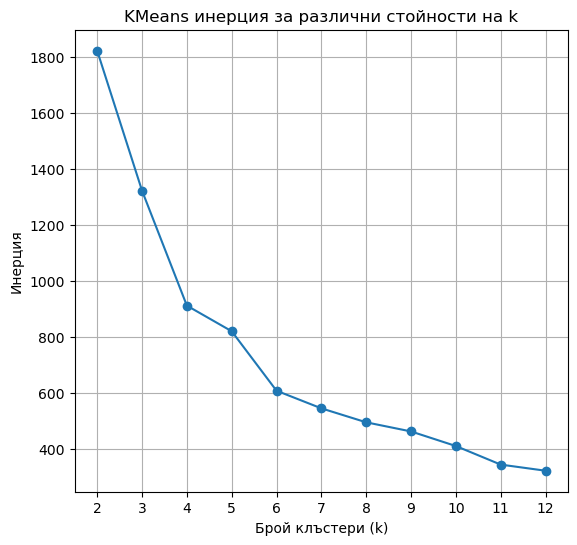

In [131]:
max_k = 12

inertia = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans инерция за различни стойности на k')
plt.xlabel('Брой клъстери (k)')
plt.ylabel('Инерция')
plt.xticks(k_values)
plt.grid(True)

Избира се стойност за k - 4.

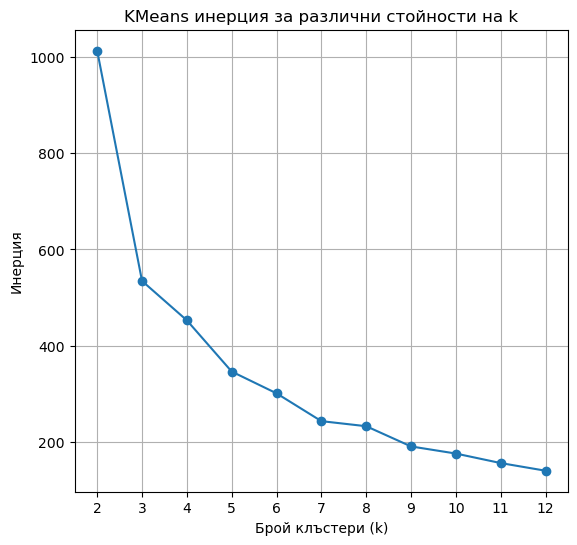

In [132]:
max_k = 12

inertia = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(scaled_data_year_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans инерция за различни стойности на k')
plt.xlabel('Брой клъстери (k)')
plt.ylabel('Инерция')
plt.xticks(k_values)
plt.grid(True)

Избира се стойност за k - 3.

In [133]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(scaled_data_df)

kmeans_year = KMeans(n_clusters=3, random_state=42)
labels_year = kmeans_year.fit_predict(scaled_data_year_df)

In [134]:
no_outliers_df['cluster'] = labels
no_outliers_df['cluster_year'] = labels_year

no_outliers_df.head(10)

/tmp/ipykernel_11777/184720430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_df['cluster'] = labels
/tmp/ipykernel_11777/184720430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_df['cluster_year'] = labels_year


,name,mass,year,reclat,reclong,cluster,cluster_year
0,Aachen,21.0,1880.0,50.77500,6.08333,0,0
1,Aarhus,720.0,1951.0,56.18333,10.23333,0,2
3,Acapulco,1914.0,1976.0,16.88333,-99.90000,0,2
4,Achiras,780.0,1902.0,-33.16667,-64.95000,2,0
5,Adhi Kot,4239.0,1919.0,32.10000,71.80000,3,2
6,Adzhi-Bogdo (stone),910.0,1949.0,44.83333,95.16667,3,2
8,Aguada,1620.0,1930.0,-31.60000,-65.23333,2,2
9,Aguila Blanca,1440.0,1920.0,-30.86667,-64.55000,2,2
10,Aioun el Atrouss,1000.0,1974.0,16.39806,-9.57028,0,2
11,Aïr,24000.0,1925.0,19.08333,8.38333,1,1


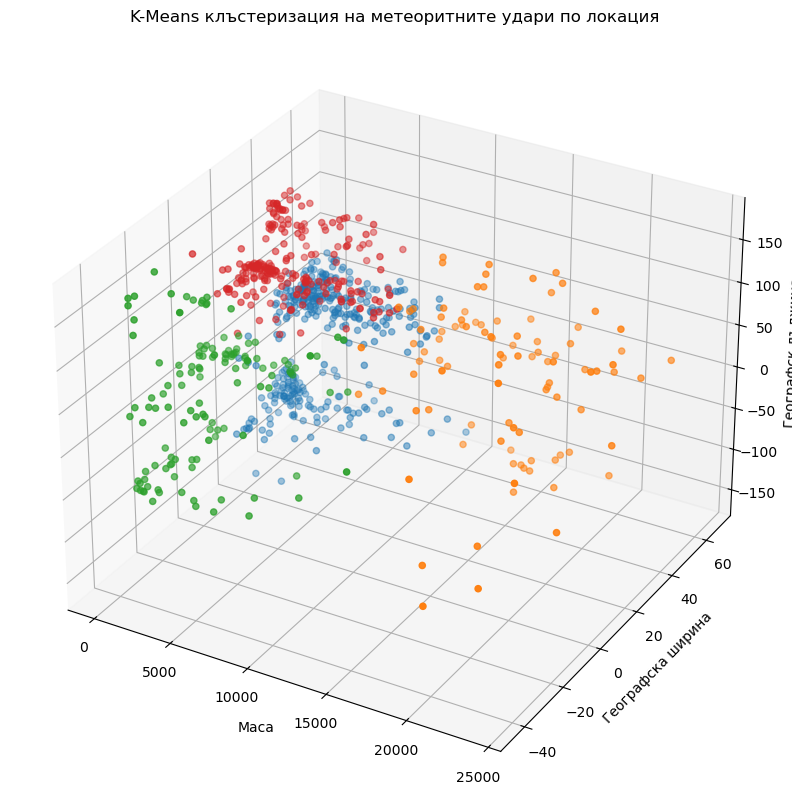

In [135]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = no_outliers_df['cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(no_outliers_df['mass'], 
                     no_outliers_df['reclat'], 
                     no_outliers_df['reclong'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Маса')
ax.set_ylabel('Географска ширина')
ax.set_zlabel('Географск дължина')

ax.set_title('K-Means клъстеризация на метеоритните удари по локация')

plt.show()

Вижда се, че в определени региони има повече метеорити отколкото при други.

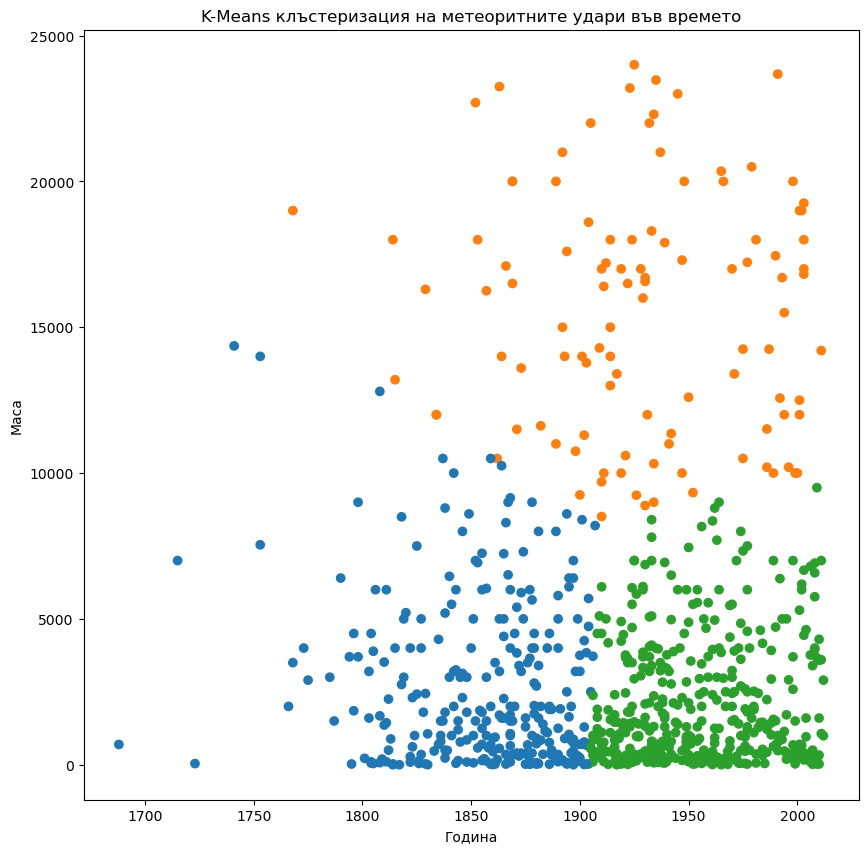

In [136]:
cluster_colors_year = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c'}  # Green

colors_year = no_outliers_df['cluster_year'].map(cluster_colors_year)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

scatter = ax.scatter(no_outliers_df['year'], no_outliers_df['mass'], c=colors_year, marker='o')

ax.set_xlabel('Година')
ax.set_ylabel('Маса')

ax.set_title('K-Means клъстеризация на метеоритните удари във времето')

plt.show()